## Data description

### Important Terms

- **Clinical Case**: The scenario (e.g., symptoms, complaints, concerns) the Standardized Patient presents to the test taker (medical student, resident or physician). Ten clinical cases are represented in this dataset.
- **Patient Note**: Text detailing important information related by the patient during the encounter (physical exam and interview).
- **Feature**: A clinically relevant concept. A rubric describes the key concepts relevant to each case.

### Training Data

<ul>
    <li>
        <b>patient_notes.csv</b> - A collection of about 40,000 Patient Note history portions. Only a subset of these have features annotated. You may wish to apply unsupervised learning techniques on the notes without annotations. The patient notes in the test set are not included in the public version of this file.
        <ul><li>pn_num - A unique identifier for each patient note.</li></ul>
        <ul><li>case_num - A unique identifier for the clinical case a patient note represents.</li></ul>
        <ul><li>pn_history - The text of the encounter as recorded by the test taker.</li></ul>
    </li>
    <li>
        <b>features.csv</b> - The rubric of features (or key concepts) for each clinical case.
            <ul><li>feature_num - A unique identifier for each feature.</li></ul>
            <ul><li>case_num - A unique identifier for each case.</li></ul>
            <ul><li>feature_text - A description of the feature.</li></ul>
    </li>
    <li>
        <b>train.csv</b> - Feature annotations for 1000 of the patient notes, 100 for each of ten cases.
                <ul><li>id - Unique identifier for each patient note / feature pair.</li></ul>
                <ul><li>pn_num - The patient note annotated in this row.</li></ul>
                <ul><li>feature_num - The feature annotated in this row.</li></ul>
                <ul><li>case_num - The case to which this patient note belongs.</li></ul>
                <ul><li>annotation - The text(s) within a patient note indicating a feature. A feature may be indicated multiple times within a single note.</li></ul>
                <ul><li>location - Character spans indicating the location of each annotation within the note. Multiple spans may be needed to represent an annotation, in which case the spans are delimited by a semicolon ;.</li></ul>
   </li>
</ul>

### So, we need to predict annotation based on Scripts (pn_history) and Symptoms (feature_text)

In [1]:
import sys
sys.path.append("..")

In [18]:
import os

import pandas as pd

import matplotlib.pyplot as plt

from src.visualization import plot_data, plot_utils

## Constants

In [3]:
data_folder = os.path.join("/", "data")
raw_folder = os.path.join(data_folder, "raw")

patient_notes_file_path = os.path.join(raw_folder, "patient_notes.csv")
features_file_path = os.path.join(raw_folder, "features.csv")
train_file_path = os.path.join(raw_folder, "train.csv")
test_file_path = os.path.join(raw_folder, "test.csv")

## Extract

In [4]:
patient_notes_df = pd.read_csv(patient_notes_file_path)
patient_notes_df.head()

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."
1,1,0,17 yo male with recurrent palpitations for the...
2,2,0,Dillon Cleveland is a 17 y.o. male patient wit...
3,3,0,a 17 yo m c/o palpitation started 3 mos ago; \...
4,4,0,17yo male with no pmh here for evaluation of p...


In [5]:
features_df = pd.read_csv(features_file_path)
features_df.head()

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded


In [6]:
train_df = pd.read_csv(train_file_path)
train_df.head()

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']


In [7]:
test_df = pd.read_csv(test_file_path)
test_df.head()

,id,case_num,pn_num,feature_num
0,00016_000,0,16,0
1,00016_001,0,16,1
2,00016_002,0,16,2
3,00016_003,0,16,3
4,00016_004,0,16,4


## Transform

### Create full train dataset with:
1. train
2. features
3. patient notes

In [8]:
train_df = pd.merge(
    train_df, features_df, how='left', on=["feature_num", "case_num"])

train_df = pd.merge(
    train_df, patient_notes_df, how='left', on=['pn_num', 'case_num'])

train_df.head()

,id,case_num,pn_num,feature_num,annotation,location,feature_text,pn_history
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724'],Family-history-of-MI-OR-Family-history-of-myoc...,HPI: 17yo M presents with palpitations. Patien...
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693'],Family-history-of-thyroid-disorder,HPI: 17yo M presents with palpitations. Patien...
2,00016_002,0,16,2,['chest pressure'],['203 217'],Chest-pressure,HPI: 17yo M presents with palpitations. Patien...
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']",Intermittent-symptoms,HPI: 17yo M presents with palpitations. Patien...
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258'],Lightheaded,HPI: 17yo M presents with palpitations. Patien...


### Create full test dataset with:
1. test
2. features
3. patient notes

In [9]:
test_df = pd.merge(
    test_df, features_df, how='left', on=["feature_num", "case_num"])

test_df = pd.merge(
    test_df, patient_notes_df, how='left', on=['pn_num', 'case_num'])

test_df.head()

,id,case_num,pn_num,feature_num,feature_text,pn_history
0,00016_000,0,16,0,Family-history-of-MI-OR-Family-history-of-myoc...,HPI: 17yo M presents with palpitations. Patien...
1,00016_001,0,16,1,Family-history-of-thyroid-disorder,HPI: 17yo M presents with palpitations. Patien...
2,00016_002,0,16,2,Chest-pressure,HPI: 17yo M presents with palpitations. Patien...
3,00016_003,0,16,3,Intermittent-symptoms,HPI: 17yo M presents with palpitations. Patien...
4,00016_004,0,16,4,Lightheaded,HPI: 17yo M presents with palpitations. Patien...


## Analysis

### Check nulls for each dataset

In [10]:
plot_data.plot_nulls_per_column(train_df)

In [11]:
plot_data.plot_nulls_per_column(test_df)

### Patient notes (patient_notes.csv)

Random patient note example

In [12]:
patient_notes_df.sample(n=1)["pn_history"].values[0]

'Ms. Moore is a 40yo F with no PMH presenting with a few (~3) week duration of nervousness/anxiety. The nervousness is constant. She recently switched her career to being an english professor and has incr nervousness that is worse on Sundays and Mondays. She does not think she is overly worried about everything. She has a decr appetite and trouble falling asleep, has not taken any meds for sleep. Denies tremors, fevers, sense of impending doom, chills, night sweats, chest pain, SOB, abd pain, diaphoresis, memory changes, weight changes, hair/skin/nail changes, palpitations. No PMH or PSH. Takes Tylenol PRN for headache if she reads too much, no other meds. Drinks alcohol socially. Drinks 5-6 cups of coffee daily. Denies tobacco, or illegal drug use. NKDA. No fam hx of thyroid or anxiety problems.'

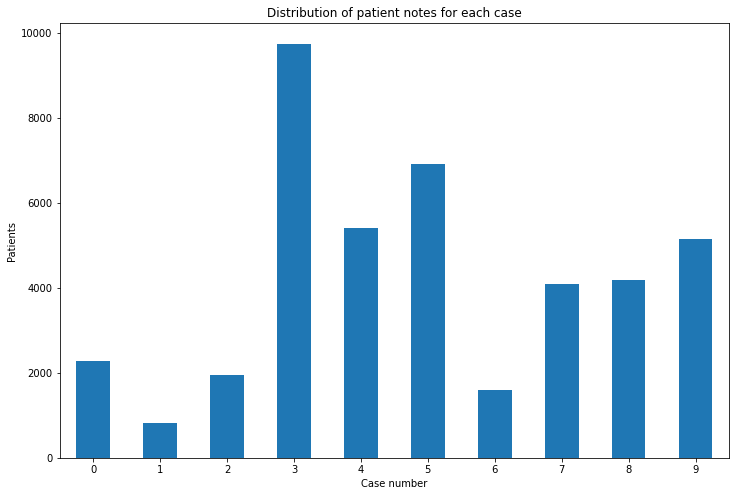

In [13]:
_ = patient_notes_df \
    .groupby("case_num") \
    .size() \
    .plot(kind="bar", figsize=(12, 8), rot=0, xlabel="Case number", 
          ylabel="Patients", title="Distribution of patient notes for each case")

In [14]:
patient_notes_df["history_len"] = patient_notes_df.pn_history.str.len()

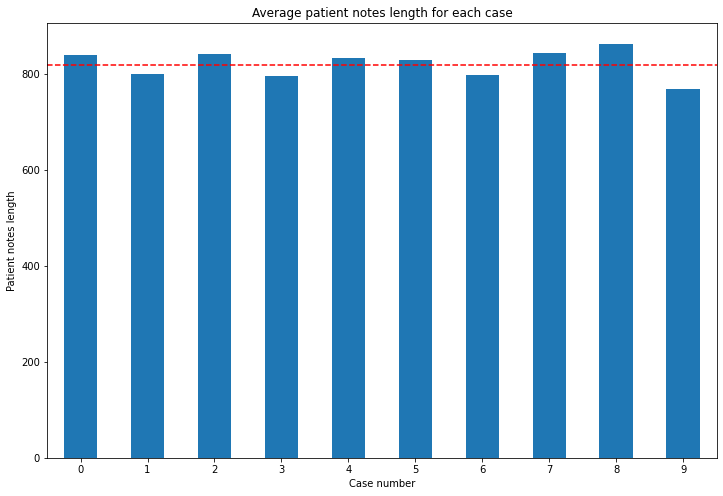

In [42]:
ax = patient_notes_df \
    .groupby("case_num") \
    .history_len \
    .mean() \
    .plot(kind="bar", figsize=(12, 8), rot=0, xlabel="Case number", 
          ylabel="Patient notes length", title="Average patient notes length for each case")
_ = ax.axhline(y=patient_notes_df.history_len.mean(), color="r", linestyle="--")

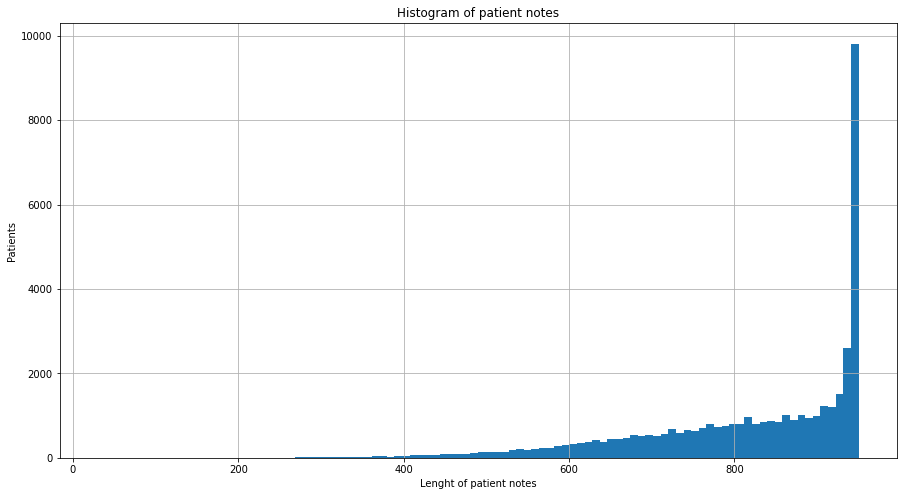

In [26]:
plot_utils.plot_histogram(
    patient_notes_df.history_len, bins=100, title="Histogram of patient notes", 
    y_label="Patients", x_label="Lenght of patient notes")

### Features data (features.csv)

In [27]:
features_df

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded
...,...,...,...
138,912,9,Family-history-of-migraines
139,913,9,Female
140,914,9,Photophobia
141,915,9,No-known-illness-contacts


Feature example

In [30]:
features_df.sample(n=1).feature_text.values[0]

'Global-headache-OR-diffuse-headache'

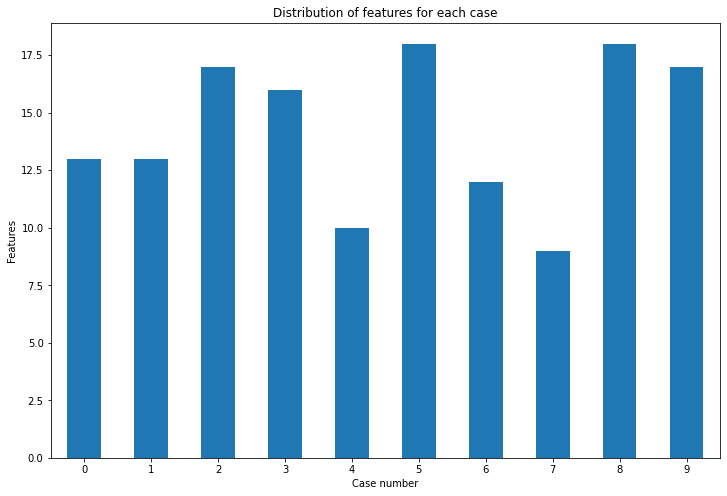

In [31]:
_ = features_df \
    .groupby("case_num") \
    .size() \
    .plot(kind="bar", figsize=(12, 8), rot=0, xlabel="Case number", 
          ylabel="Features", title="Distribution of features for each case")

In [32]:
features_df["feature_len"] = features_df.feature_text.str.len()

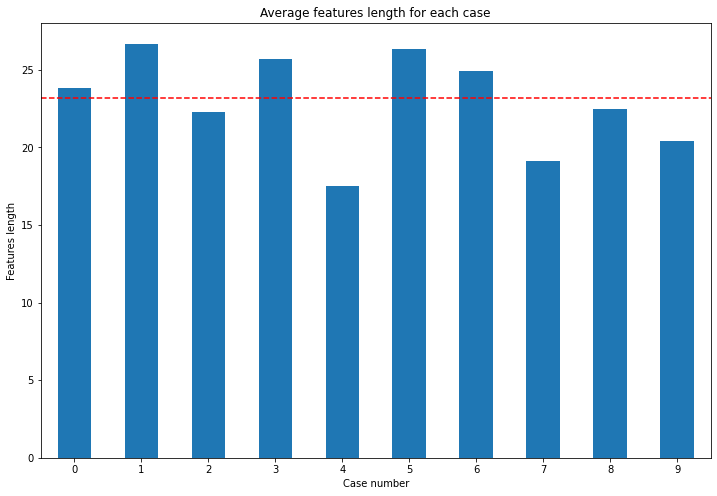

In [44]:
ax = features_df \
    .groupby("case_num") \
    .feature_len \
    .mean() \
    .plot(kind="bar", figsize=(12, 8), rot=0, xlabel="Case number", 
          ylabel="Features length", title="Average features length for each case")
_ = ax.axhline(y=features_df.feature_len.mean(), color="r", linestyle="--")

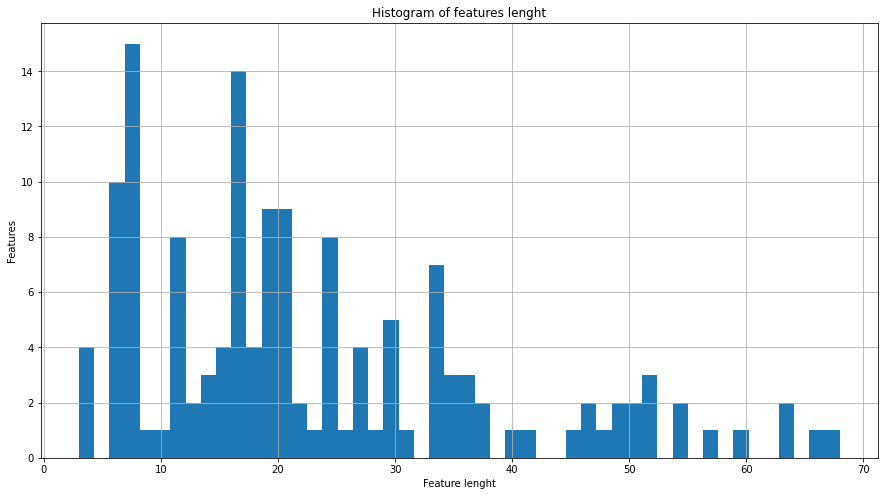

In [47]:
plot_utils.plot_histogram(
    features_df["feature_len"], bins=50, title="Histogram of features lenght", 
    x_label="Feature lenght", y_label="Features")

### Patient analysis

In [48]:
print(f"Unique patients in train data {train_df.pn_num.nunique()}")

Unique patients in train data 1000


In [58]:
random_patient_id = train_df.sample(n=1).pn_num.values[0]

In [61]:
cond_patient = train_df.pn_num == random_patient_id
patient_df = train_df[cond_patient]

patient_df

,id,case_num,pn_num,feature_num,annotation,location,feature_text,pn_history
598,01010_000,0,1010,0,['MI in his father'],['732 748'],Family-history-of-MI-OR-Family-history-of-myoc...,Dillon Cleveland is a 17 yo M who presents to ...
599,01010_001,0,1010,1,['mother has thyroid problems'],['768 795'],Family-history-of-thyroid-disorder,Dillon Cleveland is a 17 yo M who presents to ...
600,01010_002,0,1010,2,[],[],Chest-pressure,Dillon Cleveland is a 17 yo M who presents to ...
601,01010_003,0,1010,3,[],[],Intermittent-symptoms,Dillon Cleveland is a 17 yo M who presents to ...
602,01010_004,0,1010,4,['light headed'],['332 344'],Lightheaded,Dillon Cleveland is a 17 yo M who presents to ...
603,01010_005,0,1010,5,[],[],No-hair-changes-OR-no-nail-changes-OR-no-tempe...,Dillon Cleveland is a 17 yo M who presents to ...
604,01010_006,0,1010,6,['taken adderall'],['549 554;570 578'],Adderall-use,Dillon Cleveland is a 17 yo M who presents to ...
605,01010_007,0,1010,7,['SOB'],['324 327'],Shortness-of-breath,Dillon Cleveland is a 17 yo M who presents to ...
606,01010_008,0,1010,8,[],[],Caffeine-use,Dillon Cleveland is a 17 yo M who presents to ...
607,01010_009,0,1010,9,"['pounding heart', 'heart pounding']","['61 75', '295 309']",heart-pounding-OR-heart-racing,Dillon Cleveland is a 17 yo M who presents to ...


In [83]:
print(f"Patient ({random_patient_id}) notes:\n")
cond_patient = patient_notes_df.pn_num == random_patient_id
print(patient_notes_df[cond_patient].pn_history.values[0])
print("\033[92m\nAnnotations:")
for annotation in patient_df.annotation:
    print(annotation)
    
print("\033[94m\nLocations")
for location in patient_df.location:
    print(location)

Patient (1010) notes:

Dillon Cleveland is a 17 yo M who presents to the clinic for pounding heart. He states it seems to be unprovoked and has been happening for the last 2-3 months. He is has been in college for the last 7-8 months and is generally doing well with his mood and his grades. He did not one episode of heart pounding where he felt SOB and light headed while playing basketball. He denies any flushing, sweating, excessive worrying, recent illness, or allergies. He does not take any medications. No recreation drug other than 1 time with marijuana, he has taken non-prescribed adderall a couple times a week during exam times. Maximimun EtOH consumption is 3-4 beers or mixed drinks on the weekends only. Family history is positive for an MI in his father at age 52, and his mother has thyroid problems. He was never hospitalized or told he had heart problems in the past.

Annotations:
['MI in his father']
['mother has thyroid problems']
[]
[]
['light headed']
[]
['taken adderall']

### Annotation analysis

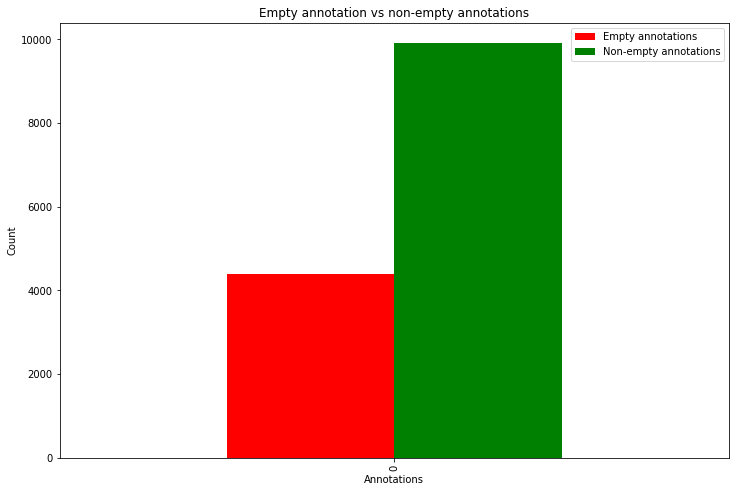

In [93]:
cond_empty_annotation = train_df.annotation == "[]"
data = {
    "Empty annotations": train_df[cond_empty_annotation].shape[0],
    "Non-empty annotations": train_df[~cond_empty_annotation].shape[0]
}
_ = pd.DataFrame(data, index=[0]) \
    .plot(kind="bar", xlabel="Annotations", ylabel="Count", 
          figsize=(12, 8), color=["r", "g"], title="Empty annotation vs non-empty annotations")

In [97]:
train_df["annotation"] = train_df.annotation.apply(lambda x: eval(x))

In [103]:
train_df["annotation_number"] = train_df.annotation.str.len()

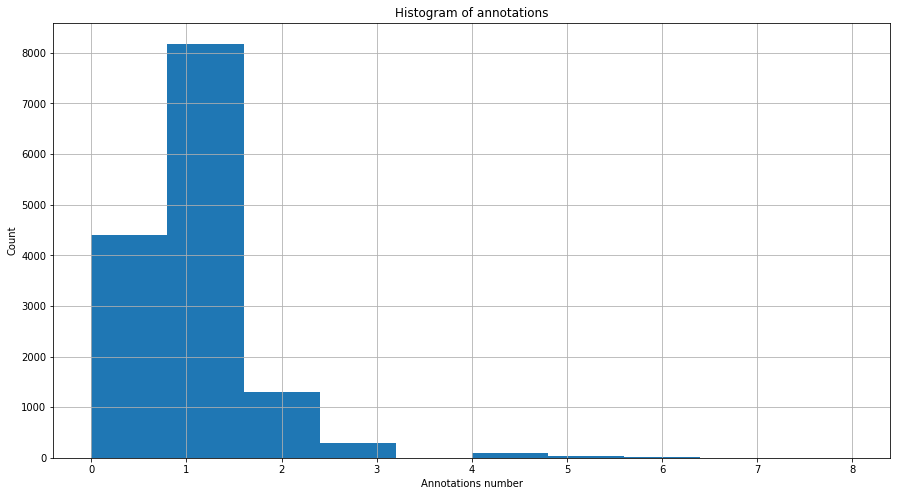

In [110]:
plot_utils.plot_histogram(
    train_df["annotation_number"], bins=10, title="Histogram of annotations", 
    x_label="Annotations number", y_label="Count")

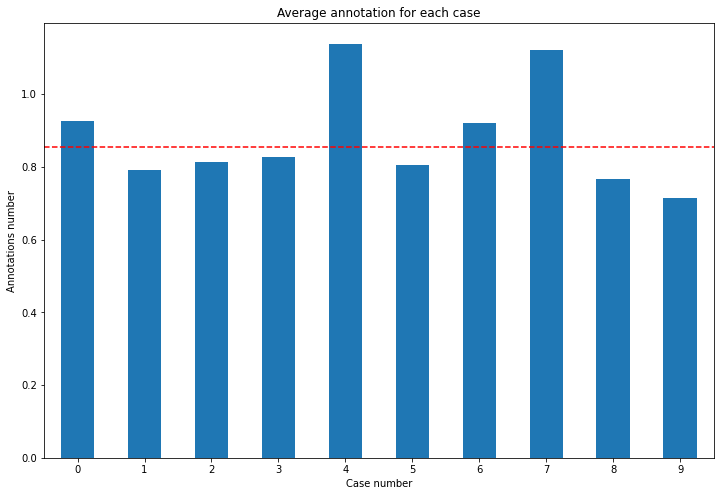

In [117]:
ax = train_df \
    .groupby("case_num") \
    .annotation_number \
    .mean() \
    .plot(kind="bar", figsize=(12, 8), rot=0, xlabel="Case number", 
          ylabel="Annotations number", title="Average annotation for each case")
_ = ax.axhline(y=train_df.annotation_number.mean(), color="r", linestyle="--")

In [137]:
annotations = []
for list_annotation in train_df.annotation.values.tolist():
    for annotation in list_annotation:
        annotations.append(annotation)
        
annotations_df = pd.DataFrame(list(set(annotations)), columns=["annotation"])
annotations_df["annotation_len"] = annotations_df.annotation.str.len()

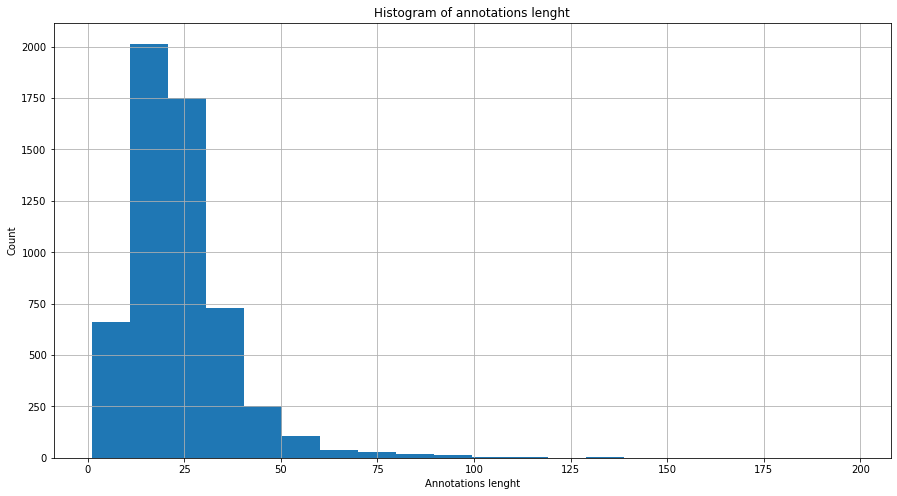

In [143]:
plot_utils.plot_histogram(
    annotations_df["annotation_len"], bins=20, title="Histogram of annotations lenght", 
    x_label="Annotations lenght", y_label="Count")

In [145]:
print(f"Mean annotations lenght {annotations_df.annotation_len.mean()}")

Mean annotations lenght 23.323906083244395


### Annotation visualitzation

In [151]:
patient_id = train_df.sample(n=1).pn_num.values[0]

cond_patient_id = train_df.pn_num == patient_id
patient_df = train_df[cond_patient_id]

In [152]:
patient_df

,id,case_num,pn_num,feature_num,annotation,location,feature_text,pn_history,annotation_number
0,00016_000,0,94243,0,[dad with recent heart attcak],['696 724'],Family-history-of-MI-OR-Family-history-of-myoc...,HPI: 17yo M presents with palpitations. Patien...,1
1,00016_001,0,94243,1,"[mom with ""thyroid disease]",['668 693'],Family-history-of-thyroid-disorder,HPI: 17yo M presents with palpitations. Patien...,1
2,00016_002,0,94243,2,[chest pressure],['203 217'],Chest-pressure,HPI: 17yo M presents with palpitations. Patien...,1
3,00016_003,0,94243,3,"[intermittent episodes, episode]","['70 91', '176 183']",Intermittent-symptoms,HPI: 17yo M presents with palpitations. Patien...,2
4,00016_004,0,94243,4,[felt as if he were going to pass out],['222 258'],Lightheaded,HPI: 17yo M presents with palpitations. Patien...,1
...,...,...,...,...,...,...,...,...,...
14295,95333_912,9,94243,912,[],[],Family-history-of-migraines,Stephanie madden is a 20 year old woman compla...,0
14296,95333_913,9,94243,913,[],[],Female,Stephanie madden is a 20 year old woman compla...,0
14297,95333_914,9,94243,914,[photobia],['274 282'],Photophobia,Stephanie madden is a 20 year old woman compla...,1
14298,95333_915,9,94243,915,[no sick contacts],['421 437'],No-known-illness-contacts,Stephanie madden is a 20 year old woman compla...,1
